In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
df=pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [4]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [5]:
df['Level'].replace('High',2,inplace=True)

In [6]:
df['Level'].replace('Medium',1,inplace=True)

In [7]:
df['Level'].replace('Low',0,inplace=True)
df=df.drop(columns=['Patient Id'])

In [8]:
A=df
A=A.drop(columns=['Level'])
df


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [9]:
A

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,3,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,4,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,7,5,3,2,7,8,2,4,5,3
996,996,37,2,6,8,7,7,7,6,7,...,7,9,6,5,7,2,4,3,1,4
997,997,25,2,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
998,998,18,2,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


In [10]:
df1=A
# Assuming df is your DataFrame
mean = df1.mean()
std = df1.std()
# Standardize the data using broadcasting
mean= ( df1- mean) / std
#center the data
centred_data=df1-mean
centred_data
# compute the covariance matrix
cov_matrix=centred_data.cov()
cov_matrix
#egienvalue decompostion
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
#print('\n eigenvalue=\n',eigenvalue)
#print('\neignvectors=\n',eignvectors)
# sort Eignvectors
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
eigen_pairs
# Step 5: Select Principal Components (choose the top k)
k = 23 # Example: Choosing the top 2 principal components
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
selected_eigenvectors.shape
#step 6:transform data
#read the concept of transform in detalis
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
transformed_data
df1=pd.DataFrame(transformed_data)
df1
df1=np.real(df1)
df1=pd.DataFrame(df1)
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.741804,-33.734660,-13.563037,2.815204,-4.570182,-2.203534,-1.279304,1.627445,1.424769,-0.178287,...,0.382265,-0.515267,-0.643160,-0.472187,0.782406,-1.006407,1.033455,-0.856327,2.878372,0.197767
1,-2.736503,-18.980535,-13.719471,4.580144,-5.799317,-4.188229,-2.747374,3.625633,0.278314,2.355863,...,-0.370626,0.961299,-1.154843,0.554425,0.473619,0.113689,-0.075454,-1.529507,3.493906,0.234596
2,-3.738539,-35.735247,-18.314698,6.799414,-6.419621,0.702223,-2.415328,1.710868,0.742368,-0.390919,...,-0.663491,-0.238480,-0.567106,-0.016598,1.157513,-0.620786,0.137237,-1.029806,2.844487,0.131166
3,-4.735846,-37.593762,-20.997770,2.059913,-4.160359,-2.434924,-4.307448,1.465060,2.414470,-0.487184,...,-0.565467,-0.364464,-0.415945,-0.212871,1.251701,-0.209139,0.554685,-1.135419,3.177416,-0.022063
4,-5.733192,-45.841251,-20.855838,0.518477,-3.806642,-2.240092,-2.017793,1.741942,1.423498,-0.415942,...,-0.592487,-0.781100,-0.477256,-0.297462,1.359257,-0.125040,0.263730,-0.985789,2.919438,0.209634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-993.301532,-43.820712,-20.118085,0.877158,-6.346071,-4.990482,-2.431114,2.969306,1.315058,0.382436,...,-0.541383,-0.485337,-0.687904,0.658214,0.760707,-0.498481,0.408483,-0.791670,2.637794,0.293572
996,-994.298223,-37.512274,-21.090262,3.318742,-5.661844,-3.206062,-0.653267,0.457098,-0.947719,-0.348632,...,-0.911542,-0.717106,0.133651,0.351481,0.806811,0.104894,0.735757,-0.890468,3.034298,0.118813
997,-995.292303,-26.446228,-18.006448,6.780480,-6.220919,0.759407,-2.393579,1.597111,0.638629,-0.429989,...,-0.518996,-0.511771,-0.037643,0.300113,0.644774,-0.349651,0.456514,-1.056776,2.908386,0.171135
998,-996.288728,-20.066329,-21.047137,0.649089,-3.452778,-2.032687,-1.915163,1.339397,1.350711,-0.453328,...,-0.416651,-1.046568,0.063829,-0.017100,0.853859,0.066003,0.529132,-0.987676,2.949714,0.251851


In [29]:
df2=A
# Assuming df is your DataFrame
mean = df2.mean()
std = df2.std()
# Standardize the data using broadcasting
mean= ( df2- mean) / std
#center the data
centred_data=df2-mean
centred_data
# compute the covariance matrix
cov_matrix=centred_data.cov()
cov_matrix
#egienvalue decompostion
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
#print('\n eigenvalue=\n',eigenvalue)
#print('\neignvectors=\n',eignvectors)
# sort Eignvectors
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
eigen_pairs
# Step 5: Select Principal Components (choose the top k)
k = 22 # Example: Choosing the top 2 principal components
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
selected_eigenvectors.shape
#step 6:transform data
#read the concept of transform in detalis
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
transformed_data
df2=pd.DataFrame(transformed_data)
df2
df2=np.real(df2)
df2=pd.DataFrame(df2)
df2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.741804,-33.734660,-13.563037,2.815204,-4.570182,-2.203534,-1.279304,1.627445,1.424769,-0.178287,...,-1.613073,0.382265,-0.515267,-0.643160,-0.472187,0.782406,-1.006407,1.033455,-0.856327,2.878372
1,-2.736503,-18.980535,-13.719471,4.580144,-5.799317,-4.188229,-2.747374,3.625633,0.278314,2.355863,...,-1.115896,-0.370626,0.961299,-1.154843,0.554425,0.473619,0.113689,-0.075454,-1.529507,3.493906
2,-3.738539,-35.735247,-18.314698,6.799414,-6.419621,0.702223,-2.415328,1.710868,0.742368,-0.390919,...,-0.767586,-0.663491,-0.238480,-0.567106,-0.016598,1.157513,-0.620786,0.137237,-1.029806,2.844487
3,-4.735846,-37.593762,-20.997770,2.059913,-4.160359,-2.434924,-4.307448,1.465060,2.414470,-0.487184,...,-0.508365,-0.565467,-0.364464,-0.415945,-0.212871,1.251701,-0.209139,0.554685,-1.135419,3.177416
4,-5.733192,-45.841251,-20.855838,0.518477,-3.806642,-2.240092,-2.017793,1.741942,1.423498,-0.415942,...,-0.638903,-0.592487,-0.781100,-0.477256,-0.297462,1.359257,-0.125040,0.263730,-0.985789,2.919438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-993.301532,-43.820712,-20.118085,0.877158,-6.346071,-4.990482,-2.431114,2.969306,1.315058,0.382436,...,-0.718463,-0.541383,-0.485337,-0.687904,0.658214,0.760707,-0.498481,0.408483,-0.791670,2.637794
996,-994.298223,-37.512274,-21.090262,3.318742,-5.661844,-3.206062,-0.653267,0.457098,-0.947719,-0.348632,...,-0.165708,-0.911542,-0.717106,0.133651,0.351481,0.806811,0.104894,0.735757,-0.890468,3.034298
997,-995.292303,-26.446228,-18.006448,6.780480,-6.220919,0.759407,-2.393579,1.597111,0.638629,-0.429989,...,-0.497220,-0.518996,-0.511771,-0.037643,0.300113,0.644774,-0.349651,0.456514,-1.056776,2.908386
998,-996.288728,-20.066329,-21.047137,0.649089,-3.452778,-2.032687,-1.915163,1.339397,1.350711,-0.453328,...,-0.596774,-0.416651,-1.046568,0.063829,-0.017100,0.853859,0.066003,0.529132,-0.987676,2.949714


In [30]:
df3=A
# Assuming df is your DataFrame
mean = df3.mean()
std = df3.std()
# Standardize the data using broadcasting
mean= ( df3- mean) / std
#center the data
centred_data=df3-mean
centred_data
# compute the covariance matrix
cov_matrix=centred_data.cov()
cov_matrix
#egienvalue decompostion
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
#print('\n eigenvalue=\n',eigenvalue)
#print('\neignvectors=\n',eignvectors)
# sort Eignvectors
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
eigen_pairs
# Step 5: Select Principal Components (choose the top k)
k = 21 # Example: Choosing the top 2 principal components
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
selected_eigenvectors.shape
#step 6:transform data
#read the concept of transform in detalis
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
transformed_data
df3=pd.DataFrame(transformed_data)
df3
df3=np.real(df3)
df3=pd.DataFrame(df3)
df3

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.741804,-33.734660,-13.563037,2.815204,-4.570182,-2.203534,-1.279304,1.627445,1.424769,-0.178287,...,0.780527,-1.613073,0.382265,-0.515267,-0.643160,-0.472187,0.782406,-1.006407,1.033455,-0.856327
1,-2.736503,-18.980535,-13.719471,4.580144,-5.799317,-4.188229,-2.747374,3.625633,0.278314,2.355863,...,0.694821,-1.115896,-0.370626,0.961299,-1.154843,0.554425,0.473619,0.113689,-0.075454,-1.529507
2,-3.738539,-35.735247,-18.314698,6.799414,-6.419621,0.702223,-2.415328,1.710868,0.742368,-0.390919,...,1.297063,-0.767586,-0.663491,-0.238480,-0.567106,-0.016598,1.157513,-0.620786,0.137237,-1.029806
3,-4.735846,-37.593762,-20.997770,2.059913,-4.160359,-2.434924,-4.307448,1.465060,2.414470,-0.487184,...,2.169798,-0.508365,-0.565467,-0.364464,-0.415945,-0.212871,1.251701,-0.209139,0.554685,-1.135419
4,-5.733192,-45.841251,-20.855838,0.518477,-3.806642,-2.240092,-2.017793,1.741942,1.423498,-0.415942,...,0.512800,-0.638903,-0.592487,-0.781100,-0.477256,-0.297462,1.359257,-0.125040,0.263730,-0.985789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-993.301532,-43.820712,-20.118085,0.877158,-6.346071,-4.990482,-2.431114,2.969306,1.315058,0.382436,...,1.449163,-0.718463,-0.541383,-0.485337,-0.687904,0.658214,0.760707,-0.498481,0.408483,-0.791670
996,-994.298223,-37.512274,-21.090262,3.318742,-5.661844,-3.206062,-0.653267,0.457098,-0.947719,-0.348632,...,0.337316,-0.165708,-0.911542,-0.717106,0.133651,0.351481,0.806811,0.104894,0.735757,-0.890468
997,-995.292303,-26.446228,-18.006448,6.780480,-6.220919,0.759407,-2.393579,1.597111,0.638629,-0.429989,...,1.317729,-0.497220,-0.518996,-0.511771,-0.037643,0.300113,0.644774,-0.349651,0.456514,-1.056776
998,-996.288728,-20.066329,-21.047137,0.649089,-3.452778,-2.032687,-1.915163,1.339397,1.350711,-0.453328,...,0.535869,-0.596774,-0.416651,-1.046568,0.063829,-0.017100,0.853859,0.066003,0.529132,-0.987676


In [31]:
df4=A
# Assuming df is your DataFrame
mean = df4.mean()
std = df4.std()
# Standardize the data using broadcasting
mean= ( df4- mean) / std
#center the data
centred_data=df4-mean
centred_data
# compute the covariance matrix
cov_matrix=centred_data.cov()
cov_matrix
#egienvalue decompostion
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
#print('\n eigenvalue=\n',eigenvalue)
#print('\neignvectors=\n',eignvectors)
# sort Eignvectors
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
eigen_pairs
# Step 5: Select Principal Components (choose the top k)
k = 20 # Example: Choosing the top 2 principal components
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
selected_eigenvectors.shape
#step 6:transform data
#read the concept of transform in detalis
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
transformed_data
df4=pd.DataFrame(transformed_data)
df4
df4=np.real(df4)
df4=pd.DataFrame(df4)
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.741804,-33.734660,-13.563037,2.815204,-4.570182,-2.203534,-1.279304,1.627445,1.424769,-0.178287,0.242693,0.780527,-1.613073,0.382265,-0.515267,-0.643160,-0.472187,0.782406,-1.006407,1.033455
1,-2.736503,-18.980535,-13.719471,4.580144,-5.799317,-4.188229,-2.747374,3.625633,0.278314,2.355863,-0.793532,0.694821,-1.115896,-0.370626,0.961299,-1.154843,0.554425,0.473619,0.113689,-0.075454
2,-3.738539,-35.735247,-18.314698,6.799414,-6.419621,0.702223,-2.415328,1.710868,0.742368,-0.390919,-0.189235,1.297063,-0.767586,-0.663491,-0.238480,-0.567106,-0.016598,1.157513,-0.620786,0.137237
3,-4.735846,-37.593762,-20.997770,2.059913,-4.160359,-2.434924,-4.307448,1.465060,2.414470,-0.487184,0.248261,2.169798,-0.508365,-0.565467,-0.364464,-0.415945,-0.212871,1.251701,-0.209139,0.554685
4,-5.733192,-45.841251,-20.855838,0.518477,-3.806642,-2.240092,-2.017793,1.741942,1.423498,-0.415942,-0.855145,0.512800,-0.638903,-0.592487,-0.781100,-0.477256,-0.297462,1.359257,-0.125040,0.263730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-993.301532,-43.820712,-20.118085,0.877158,-6.346071,-4.990482,-2.431114,2.969306,1.315058,0.382436,0.738504,1.449163,-0.718463,-0.541383,-0.485337,-0.687904,0.658214,0.760707,-0.498481,0.408483
996,-994.298223,-37.512274,-21.090262,3.318742,-5.661844,-3.206062,-0.653267,0.457098,-0.947719,-0.348632,1.965830,0.337316,-0.165708,-0.911542,-0.717106,0.133651,0.351481,0.806811,0.104894,0.735757
997,-995.292303,-26.446228,-18.006448,6.780480,-6.220919,0.759407,-2.393579,1.597111,0.638629,-0.429989,-0.245356,1.317729,-0.497220,-0.518996,-0.511771,-0.037643,0.300113,0.644774,-0.349651,0.456514
998,-996.288728,-20.066329,-21.047137,0.649089,-3.452778,-2.032687,-1.915163,1.339397,1.350711,-0.453328,-0.849179,0.535869,-0.596774,-0.416651,-1.046568,0.063829,-0.017100,0.853859,0.066003,0.529132


In [32]:
df5=A
# Assuming df is your DataFrame
mean = df5.mean()
std = df5.std()
# Standardize the data using broadcasting
mean= ( df5- mean) / std
#center the data
centred_data=df5-mean
centred_data
# compute the covariance matrix
cov_matrix=centred_data.cov()
cov_matrix
#egienvalue decompostion
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
#print('\n eigenvalue=\n',eigenvalue)
#print('\neignvectors=\n',eignvectors)
# sort Eignvectors
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
eigen_pairs
# Step 5: Select Principal Components (choose the top k)
k = 19 # Example: Choosing the top 2 principal components
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
selected_eigenvectors.shape
#step 6:transform data
#read the concept of transform in detalis
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
transformed_data
df5=pd.DataFrame(transformed_data)
df5
df5=np.real(df5)
df5=pd.DataFrame(df5)
df5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.741804,-33.734660,-13.563037,2.815204,-4.570182,-2.203534,-1.279304,1.627445,1.424769,-0.178287,0.242693,0.780527,-1.613073,0.382265,-0.515267,-0.643160,-0.472187,0.782406,-1.006407
1,-2.736503,-18.980535,-13.719471,4.580144,-5.799317,-4.188229,-2.747374,3.625633,0.278314,2.355863,-0.793532,0.694821,-1.115896,-0.370626,0.961299,-1.154843,0.554425,0.473619,0.113689
2,-3.738539,-35.735247,-18.314698,6.799414,-6.419621,0.702223,-2.415328,1.710868,0.742368,-0.390919,-0.189235,1.297063,-0.767586,-0.663491,-0.238480,-0.567106,-0.016598,1.157513,-0.620786
3,-4.735846,-37.593762,-20.997770,2.059913,-4.160359,-2.434924,-4.307448,1.465060,2.414470,-0.487184,0.248261,2.169798,-0.508365,-0.565467,-0.364464,-0.415945,-0.212871,1.251701,-0.209139
4,-5.733192,-45.841251,-20.855838,0.518477,-3.806642,-2.240092,-2.017793,1.741942,1.423498,-0.415942,-0.855145,0.512800,-0.638903,-0.592487,-0.781100,-0.477256,-0.297462,1.359257,-0.125040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-993.301532,-43.820712,-20.118085,0.877158,-6.346071,-4.990482,-2.431114,2.969306,1.315058,0.382436,0.738504,1.449163,-0.718463,-0.541383,-0.485337,-0.687904,0.658214,0.760707,-0.498481
996,-994.298223,-37.512274,-21.090262,3.318742,-5.661844,-3.206062,-0.653267,0.457098,-0.947719,-0.348632,1.965830,0.337316,-0.165708,-0.911542,-0.717106,0.133651,0.351481,0.806811,0.104894
997,-995.292303,-26.446228,-18.006448,6.780480,-6.220919,0.759407,-2.393579,1.597111,0.638629,-0.429989,-0.245356,1.317729,-0.497220,-0.518996,-0.511771,-0.037643,0.300113,0.644774,-0.349651
998,-996.288728,-20.066329,-21.047137,0.649089,-3.452778,-2.032687,-1.915163,1.339397,1.350711,-0.453328,-0.849179,0.535869,-0.596774,-0.416651,-1.046568,0.063829,-0.017100,0.853859,0.066003


# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [13]:

X=df1
y=df['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf1 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))





df1 : 100.0 
 [[58  0  0]
 [ 0 65  0]
 [ 0  0 77]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# LR

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [15]:
X=df1
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1: ',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1:  96.0 
 [[50  3  2]
 [ 3 60  0]
 [ 0  0 82]] 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.95      0.95      0.95        63
           2       0.98      1.00      0.99        82

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



# NB

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
k=42 # here we difine the random state

In [17]:
X=df1
y=df['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 98.0 
 [[55  0  0]
 [ 1 61  1]
 [ 2  0 80]] 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.97      0.98        63
           2       0.99      0.98      0.98        82

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# DT

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [19]:
X=df1
y=df['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 99.5 
 [[56  0  0]
 [ 0 57  1]
 [ 0  0 86]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      0.98      0.99        58
           2       0.99      1.00      0.99        86

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200



# RF

In [20]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [21]:
X=df1
y=df['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 100.0 
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X = df1
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df1: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1: 79.50 
 [[49  6  0]
 [35 28  0]
 [ 0  0 82]] 
               precision    recall  f1-score   support

           0       0.58      0.89      0.71        55
           1       0.82      0.44      0.58        63
           2       1.00      1.00      1.00        82

    accuracy                           0.80       200
   macro avg       0.80      0.78      0.76       200
weighted avg       0.83      0.80      0.79       200



# SVM Linear

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X=df1
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df1 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))

 df1 linear: 100.0 
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# SVM RBF

In [26]:
X=df1
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df1 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df1 RBF: 43.0 
 [[14 11 30]
 [ 9 17 37]
 [12 15 55]] 
               precision    recall  f1-score   support

           0       0.40      0.25      0.31        55
           1       0.40      0.27      0.32        63
           2       0.45      0.67      0.54        82

    accuracy                           0.43       200
   macro avg       0.42      0.40      0.39       200
weighted avg       0.42      0.43      0.41       200



# SVM sigmoid

In [27]:
X=df1
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df1 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df1 Sigmoid:  33.0 
 [[28 27  0]
 [26 33  4]
 [35 42  5]] 
               precision    recall  f1-score   support

           0       0.31      0.51      0.39        55
           1       0.32      0.52      0.40        63
           2       0.56      0.06      0.11        82

    accuracy                           0.33       200
   macro avg       0.40      0.36      0.30       200
weighted avg       0.42      0.33      0.28       200



# SVM ploynomial

46.33333333333333
degree= 7
Polynomial  46.33333333333333

 df1 : [[82  2  0]
 [76 19  2]
 [81  4 34]] 
               precision    recall  f1-score   support

           0       0.34      0.98      0.51        84
           1       0.76      0.20      0.31        97
           2       0.94      0.29      0.44       119

    accuracy                           0.45       300
   macro avg       0.68      0.49      0.42       300
weighted avg       0.72      0.45      0.42       300



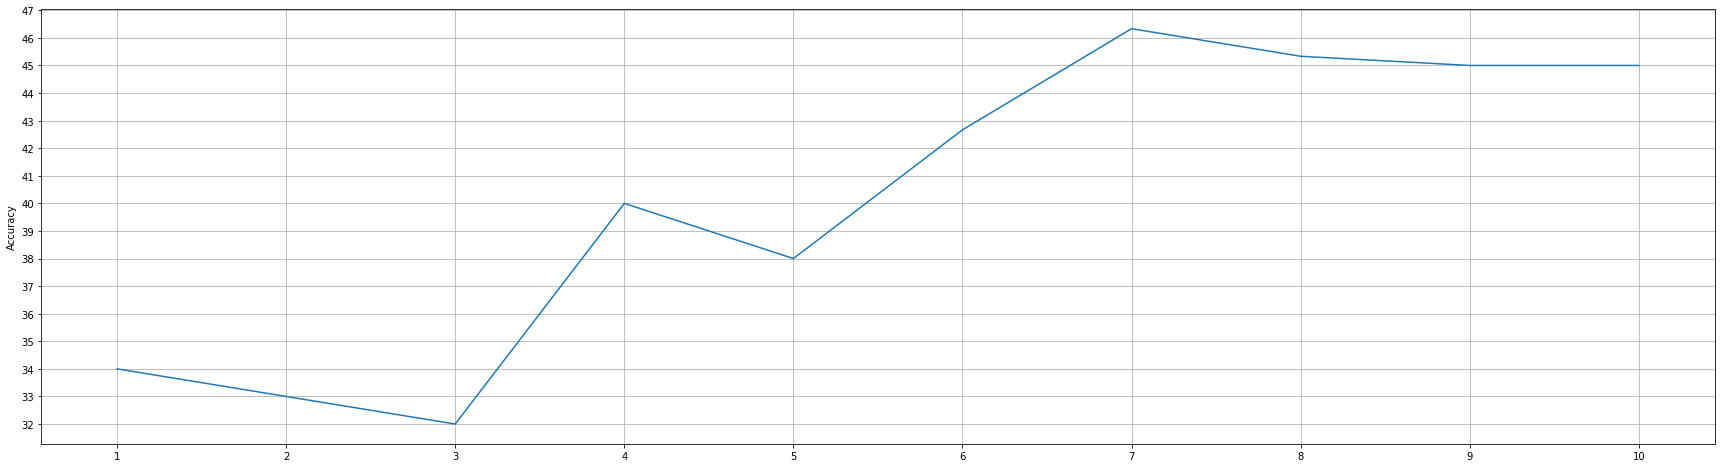

In [28]:
scores=[]
X=df1
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 41,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df1 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))